# Load necessary python modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# Load Dataset 

In [2]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# customerID:顾客ID；gender：性别；SeniorCitizen是否老年人；Partner：是否已婚；Dependents：是否有亲属；tenure：使用时长；
# PhoneService：是否订购电话业务；MultipleLines：是否多重号码；InternetService：是否宽带网络；OnlineSecurity：是否开通网络安全
# OnlineBackup：线上备份服务；DeviceProtection：设备保护；TechSupport：是否订购技术电话支持；StreamingTV：网络电视；
# StreamingMovies：网络电影；Contract：沟通维护频率；PaperlessBilling：是否有电子账单；PaymentMethod：支付方式；
# MonthlyCharges：每月消费；TotalCharges：累积消费；Churn：是否流失
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# basic Inspection on dataset

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
(7043, 20)
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


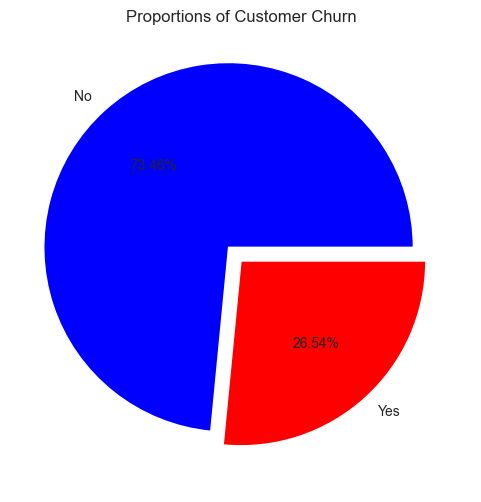

In [6]:
# Remove/drop unwanted columns
df.drop(columns=["customerID"], inplace=True)
#columns/feature names
print(df.columns)
#check the shape rows and columns
print(df.shape)
# Checking the data types of all the columns
print(df.dtypes)

plt.figure(figsize=(6, 6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, colors=['blue', 'red'], autopct='%1.2f%%',
        explode=(0.1, 0))
plt.title('Proportions of Customer Churn')
plt.show()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False   False          False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7043
Nam

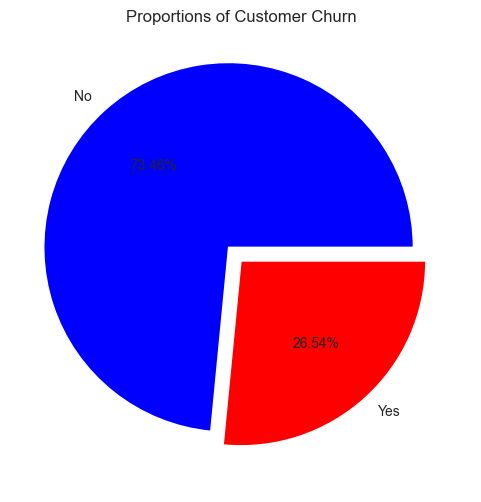

In [7]:
#Null / Nan Values
print(df.isnull().sum())
print(df.isnull().value_counts())
print('------')
#Balanced / Imbalanced Dataset
print(df["Churn"].value_counts(normalize=True))
#describe
print(df.describe())
print(df.info())

plt.figure(figsize=(6, 6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, colors=['blue', 'red'], autopct='%1.2f%%',
        explode=(0.1, 0))
plt.title('Proportions of Customer Churn')
plt.show()
# Observations

# Dataset has rows/sample=7043 ,Coulmns/features=20
# Dataset - features: gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','MonthlyCharges', 'TotalCharges', 'Churn'
# Churn is dependent variable.
# It is imbalanced Dataset
# Dataset did not have - Null / Nan Values

In [8]:
# Convert non numerical data to numerical
df.SeniorCitizen = df.SeniorCitizen.apply(lambda x: "No" if x == 0 else "Yes")
print(df["SeniorCitizen"])
# df["SeniorCitizen"] = df.SeniorCitizen.apply(lambda x: "No" if x==0 else "Yes")
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
df["TotalCharges"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
# Return unique values based on a hash table.
for col in df:
    if (df[col].dtype == "object"):
        print(col, ":", df[col].unique())


gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [10]:
for col in df:
    if (df[col].dtype == "object") and (df[col].nunique() == 3):
        df[col] = df[col].apply(lambda x: "No" if x == "No internet service" else x)

In [11]:
# Return unique values based on a hash table.

for col in df:
    if (df[col].dtype == "object"):
        print(col, ":", df[col].unique())


gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [12]:
df["MultipleLines"] = df["MultipleLines"].apply(lambda x: "No" if x == "No phone service" else x)

In [13]:
for col in df:
    if (df[col].dtype == "object"):
        print(col, ":", df[col].unique())


gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


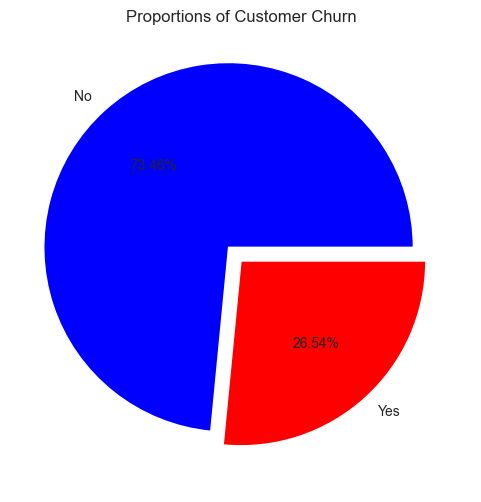

In [14]:
plt.figure(figsize=(6, 6))
plt.pie(df['Churn'].value_counts(), labels=df['Churn'].value_counts().index, colors=['blue', 'red'], autopct='%1.2f%%',
        explode=(0.1, 0))
plt.title('Proportions of Customer Churn')
plt.show()

# Data Analysis, Visualization and Interpretation

In [15]:
con_vara = [i for i in df.columns if df[i].dtype != "object"]
print(con_vara)

['tenure', 'MonthlyCharges', 'TotalCharges']


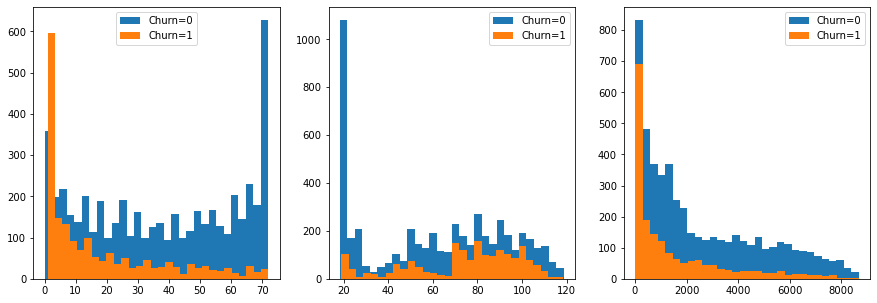

In [111]:
# Plot univariate or bivariate histograms to show distributions of datasets.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, x in enumerate(con_vara):
    ax[i].hist(df[x][df.Churn == "No"], label="Churn=0", bins=30)
    ax[i].hist(df[x][df.Churn == "Yes"], label="Churn=1", bins=30)
    ax[i].legend()

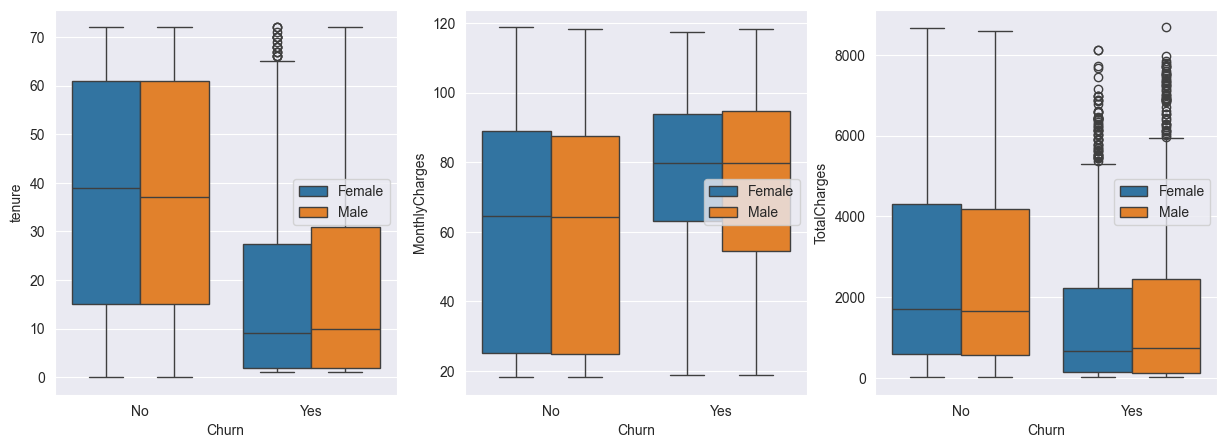

In [16]:
# Box-Plots: continuous variable
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, x in enumerate(con_vara):
    sns.boxplot(x=df.Churn, y=df[x], ax=ax[i], hue=df.gender)
    ax[i].legend()

In [113]:
# Observations

# Total Charges has outliers
# Tenure has outliers
# Monthyly charges did not have outliers

In [17]:
# Count-Plots: categorical variable

cat_vara = [i for i in df.columns if df[i].dtype == "object"]
print(cat_vara)
cat_vara.pop()
print(cat_vara)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


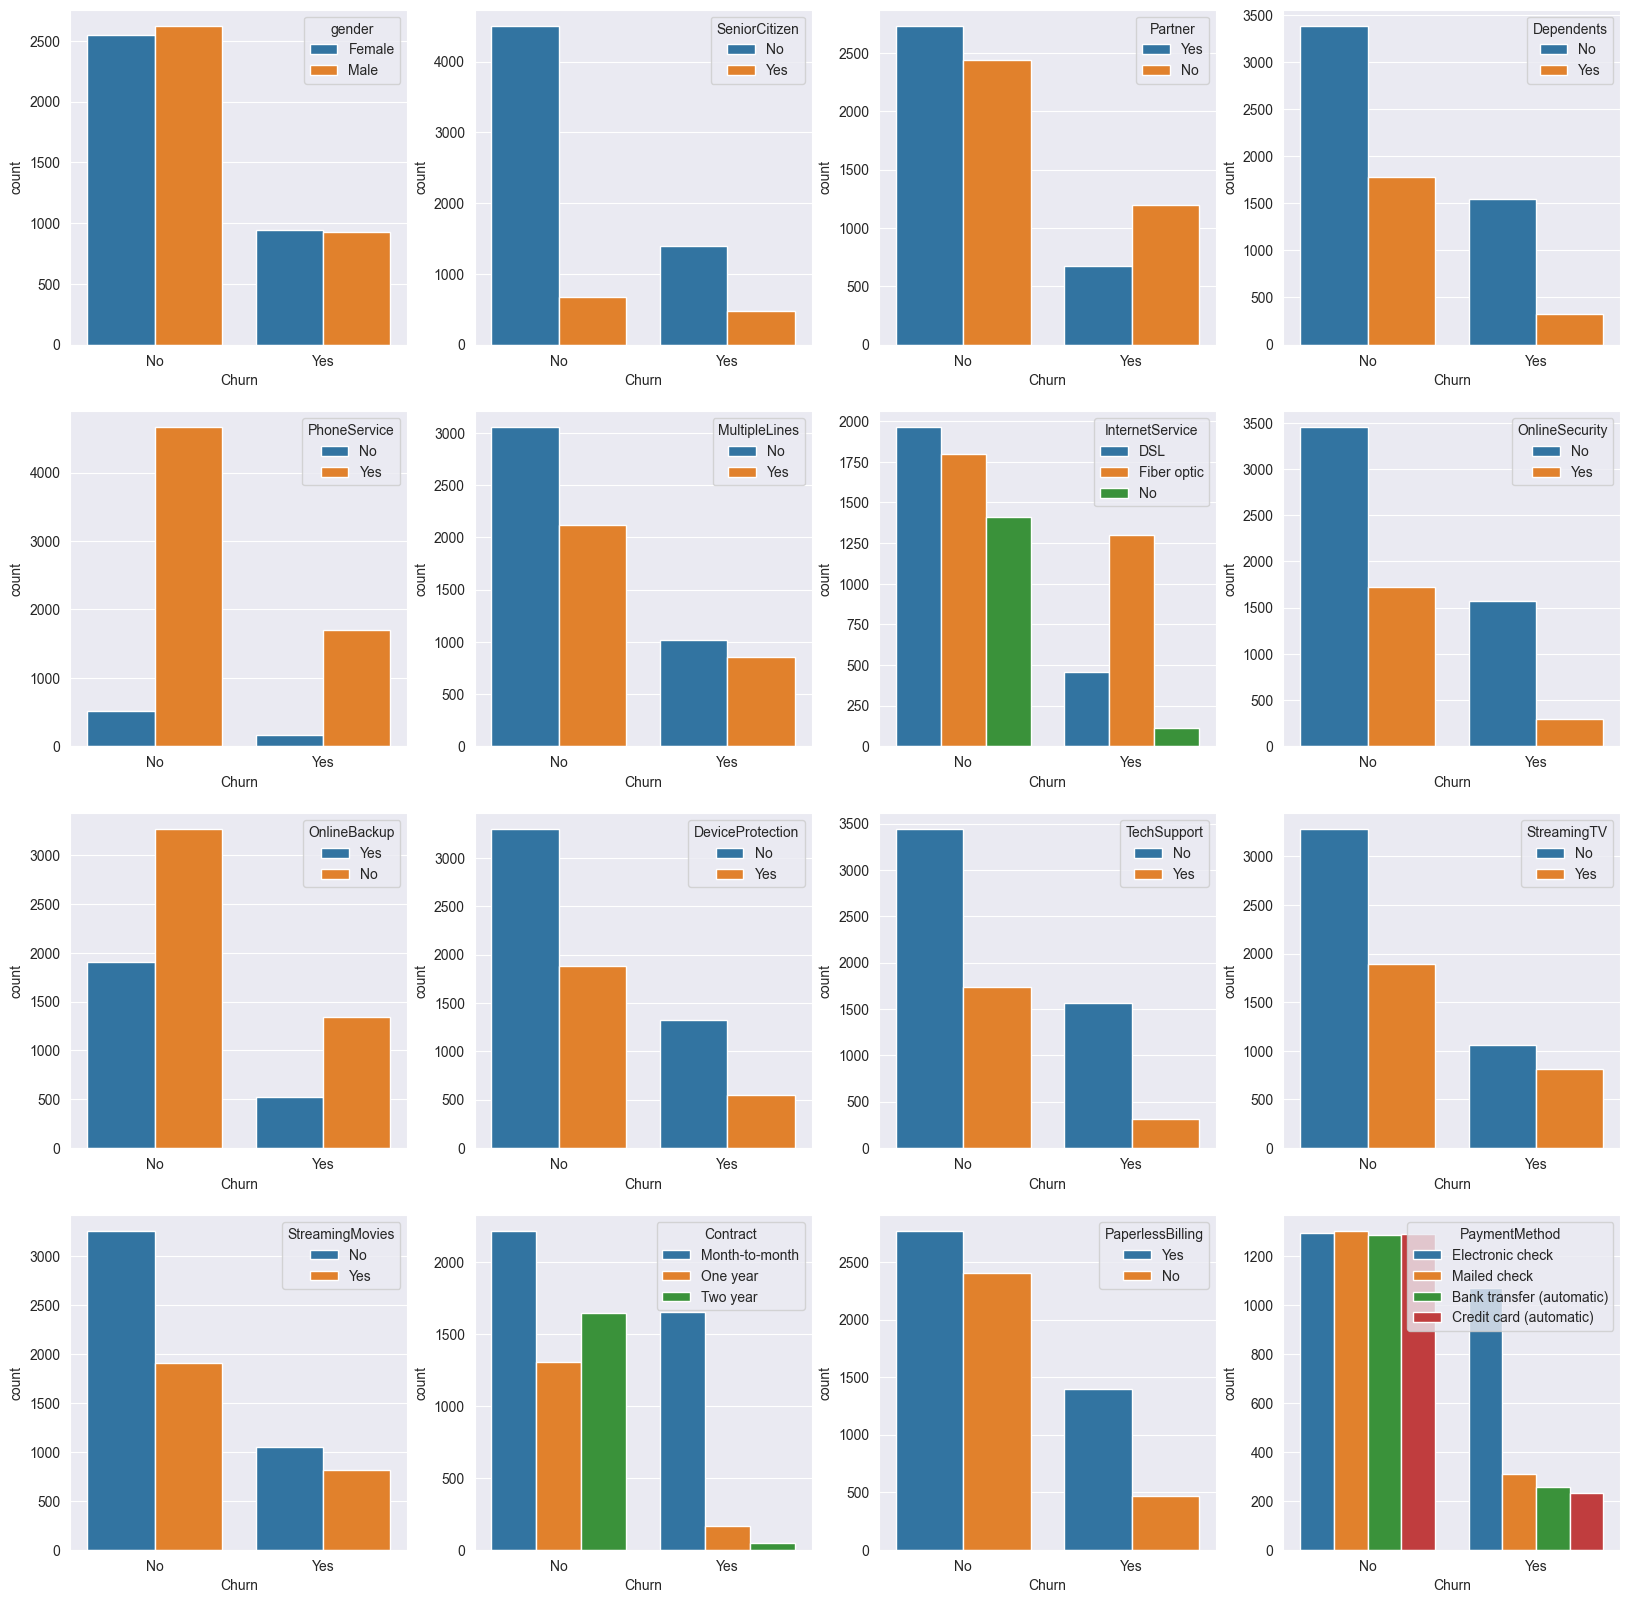

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for axi, x in zip(ax.flat, cat_vara):
    sns.countplot(x=df.Churn, hue=df[x], ax=axi)

In [116]:
# Observations

# In gender , female tends more to churn - leave /exit the service
# In Age - Young/Youth tends to churn - leave /exit the service
# In partener - Individual tends to churn - leave /exit the service
# Phone Service - Havving - tends to churn - leave /exit the service
# Month to Month -Contract - tends to churn - leave /exit the service

# Categorical Data Encoding

In [19]:
le = LabelEncoder()
for col in df:
    if (df[col].dtype == "object") and (df[col].nunique() == 2):
        df[col] = le.fit_transform(df[col])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   object 


In [21]:
# Convert categorical variable into dummy/indicator variables.
df = pd.get_dummies(df, columns=[i for i in df.columns if df[i].dtypes == 'object'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int32  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   MultipleLines                          7043 non-null   int32  
 7   OnlineSecurity                         7043 non-null   int32  
 8   OnlineBackup                           7043 non-null   int32  
 9   DeviceProtection                       7043 non-null   int32  
 10  TechSupport                            7043 non-null   int32  
 11  Stre

# Scalling and Spliting

In [22]:
df.dropna(inplace=True)

In [23]:

from sklearn.utils import resample

df_majority = df[(df["Churn"] == 0)]
df_minority = df[(df["Churn"] == 1)]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=5000, random_state=42)
df = pd.concat([df_minority_upsampled, df_majority])
df["Churn"].value_counts()

Churn
0    5163
1    5000
Name: count, dtype: int64

In [24]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df)


array([[-1.01757045, -0.4880392 ,  1.11622885, ..., -0.47765793,
         1.19638611, -0.51340358],
       [-1.01757045, -0.4880392 , -0.89587364, ..., -0.47765793,
         1.19638611, -0.51340358],
       [ 0.98273294, -0.4880392 , -0.89587364, ..., -0.47765793,
         1.19638611, -0.51340358],
       ...,
       [-1.01757045, -0.4880392 ,  1.11622885, ...,  2.0935484 ,
        -0.83585056, -0.51340358],
       [-1.01757045, -0.4880392 ,  1.11622885, ..., -0.47765793,
         1.19638611, -0.51340358],
       [ 0.98273294, -0.4880392 , -0.89587364, ..., -0.47765793,
        -0.83585056, -0.51340358]])

In [25]:
# Split arrays or matrices into random train and test subsets.
X = df.drop(['Churn'], axis='columns')
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
print("train data length:", len(X_train), '---', X_train.shape)
print("test data length:", len(X_test), '---', X_test.shape)
len(X_train.columns)

train data length: 7114 --- (7114, 23)
test data length: 3049 --- (3049, 23)


23

# Model - NN

In [27]:
import tensorflow as tf
from tensorflow import keras

X_train = np.asarray(X_train).astype(np.float64)
Y_train = np.asarray(Y_train).astype(np.float64)

X_test = np.asarray(X_test).astype(np.float64)
Y_test = np.asarray(Y_test).astype(np.float64)

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(23,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
223/223 [==============================] - 1s 1ms/step - loss: 18.3110 - accuracy: 0.6247
Epoch 2/100
223/223 [==============================] - 0s 1ms/step - loss: 2.0237 - accuracy: 0.6761
Epoch 3/100
223/223 [==============================] - 0s 2ms/step - loss: 2.0454 - accuracy: 0.6855
Epoch 4/100
223/223 [==============================] - 0s 1ms/step - loss: 1.6458 - accuracy: 0.6919
Epoch 5/100
223/223 [==============================] - 0s 1ms/step - loss: 1.7080 - accuracy: 0.6929
Epoch 6/100
223/223 [==============================] - 0s 2ms/step - loss: 1.9454 - accuracy: 0.6937
Epoch 7/100
223/223 [==============================] - 0s 1ms/step - loss: 1.3838 - accuracy: 0.7078
Epoch 8/100
223/223 [==============================] - 0s 1ms/step - loss: 1.6631 - accuracy: 0.6955
Epoch 9/100
223/223 [==============================] - 0s 1ms/step - loss: 1.3758 - accuracy: 0.7093
Epoch 10/100
223/223 [==============================] - 0s 2ms/step - loss: 1.4946 - accur

In [29]:
print(model.summary())
X_test = np.asarray(X_test).astype(np.float64)

Y_test = np.asarray(Y_test).astype(np.float64)

model.evaluate(X_test, Y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
96/96 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.7412


[0.5081411600112915, 0.7412266135215759]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

yp = model.predict(X_test)
Y_pred = []
for element in yp:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
print(classification_report(Y_test, Y_pred))

96/96 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71      1558
         1.0       0.69      0.87      0.77      1491

    accuracy                           0.74      3049
   macro avg       0.76      0.74      0.74      3049
weighted avg       0.76      0.74      0.74      3049


Text(95.72222222222221, 0.5, 'Truth')

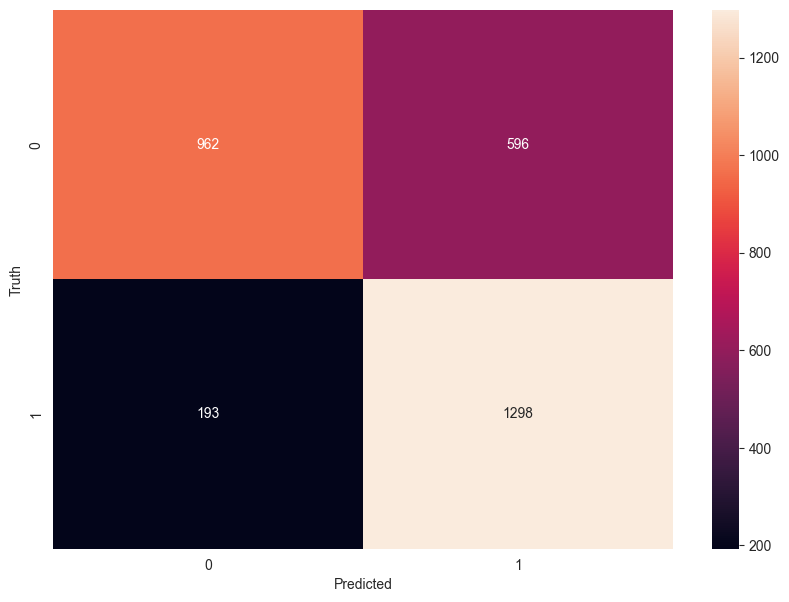

In [31]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Summary
# Very simple neural network with hidden layers

# monthly contract, tenure and total charges are the most important predictor variables to predict churn.
# NN -Accuracy - 0.72 ,loss=0.75
# F1-Score: 0.76,0.69